## Занятие 6
## Математический анализ
## Дифференцирование

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$


--------------- БЛОК 1 - f(x) ---------------



x**2*exp(-x)

Reals

Функция общего вида


[0]


--------------- БЛОК 2 - df(x) ---------------



x*(2 - x)*exp(-x)

Reals

[0, 2]


-0.232085892795886 0.171919109426832
Производная меняет знак с - на +, значит x = 0 - точка минимума.

0.0284180376523007 -0.0257158499331262
Производная меняет знак с + на -, значит x = 2 - точка максимума.

--------------- БЛОК 3 - df2(x) ---------------



(x**2 - 4*x + 2)*exp(-x)

Reals

[sqrt(2) + 2, 2 - sqrt(2)]


--------------- БЛОК 4 - Ассимптоты ---------------

Вертикальных  ассимптот нет, так как отсутсвуют точки разрыва
Горизонтальная ассимптота, y = 0 * x + 0 = 0
lim(f(x)/x), x->∞ = 0
lim(f(x)),   x->∞ = 0

--------------- БЛОК 5 - График ---------------

A   - корень (совпал с M_1)
M_1 - точка минимума
M_2 - точка максимуму
P_1 - точка перегиба
P_2 - точка перегиба


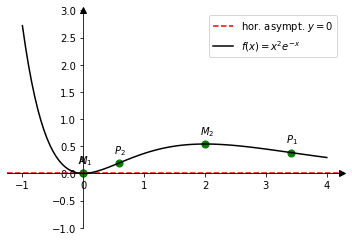

In [3]:
from sympy.abc import x

def f(x):
     return x**2 * sympy.exp(1) ** (-x)

def df(x):
    return simplify(f(x).diff(x, 1))

def df2(x):
    return simplify(f(x).diff(x, 2))

print()
print("-" * 15 + " БЛОК 1 - f(x) " + "-" * 15)
print()

# Область определения
display(f(x))
D = continuous_domain(f(x), x, S.Reals)
display(D)

# Чётность
if f(-x) == f(x):
    print('Четная функция')
elif f(-x) == -f(x):
    print('Нечетная функция')
else:
    print('Функция общего вида')

# Точки пересечения с осями координат
roots = list(solveset(f(x), domain=S.Reals))
display(roots)


print()
print("-" * 15 + " БЛОК 2 - df(x) " + "-" * 15)
print()

# Точки экстремума <=> df(x) = 0
df_D = continuous_domain(df(x), x, S.Reals) # Это область определения производной.
df_root = list(solveset(df(x), domain=S.Reals))

display(df(x))
display(df_D)
display(df_root)
print()
print(df(x).subs(x, -0.1), df(x).subs(x, 0.1))
print("Производная меняет знак с - на +, значит x = 0 - точка минимума.")
print()
print(df(x).subs(x, 1.9), df(x).subs(x, 2.1))
print("Производная меняет знак с + на -, значит x = 2 - точка максимума.")


print()
print("-" * 15 + " БЛОК 3 - df2(x) " + "-" * 15)
print()

# Точки перегиба <=> df2(x) = 0
df2_D = continuous_domain(df2(x), x, S.Reals) # Это область определения производной.
df2_root = list(solveset(df2(x), domain=S.Reals))
display(df2(x))
display(df2_D)
display(df2_root)


print()
print("-" * 15 + " БЛОК 4 - Ассимптоты " + "-" * 15)
print()

print("Вертикальных  ассимптот нет, так как отсутсвуют точки разрыва")
print("Горизонтальная ассимптота, y = 0 * x + 0 = 0")
print("lim(f(x)/x), x->∞ = 0")
print("lim(f(x)),   x->∞ = 0")


print()
print("-" * 15 + " БЛОК 5 - График " + "-" * 15)
print()

# Задание занчений полотна
minY = -1
maxY = 3
ax = plt.gca()
ax.set_ylim(minY, maxY)

# График горизантальной асимптоты
ax.axhline(y=0, color='red', linestyle='--', label=r'hor. asympt. $y=0$')

# Рисование графика
X = np.linspace(-1, 4, 100)
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')

# Добавление точек
roots.extend([float(df_root[0]), float(df_root[1]), float(df2_root[0]), float(df2_root[1])])
points_y = [float(f(point)) for point in roots]
annotations = [r'$A$', r'$M_1$', r'$M_2$', r'$P_1$', r'$P_2$']
ax.scatter(roots, points_y, 50, color='green')
for i, x0 in enumerate(roots):
    ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data', xytext=(-5, 10), textcoords='offset points', fontsize=10)

# Визуальные улучшения
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='upper right')

print("A   - корень (совпал с M_1)")
print("M_1 - точка минимума")
print("M_2 - точка максимуму")
print("P_1 - точка перегиба")
print("P_2 - точка перегиба")

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$


--------------- БЛОК 1 - f(x) ---------------



x*exp(2/x) + 1

Union(Interval.open(-oo, 0), Interval.open(0, oo))

Функция общего вида


[-2.345]


--------------- БЛОК 2 - df(x) ---------------



(x - 2)*exp(2/x)/x

Union(Interval.open(-oo, 0), Interval.open(0, oo))

[2]


-0.150799008220194 0.123422545038804
Производная меняет знак с - на +, значит x = 0 - точка минимума.

--------------- БЛОК 3 - df2(x) ---------------



4*exp(2/x)/x**3

Union(Interval.open(-oo, 0), Interval.open(0, oo))

[]

Нет точек перегиба

--------------- БЛОК 4 - Ассимптоты ---------------

1 oo
Вертикальныя ассимптота x = 0

Горизонтальная ассимптота, y = 1 * x + 3
 lim(f(x)/x) , x->∞ = 1
lim(f(x) - x), x->∞ = 3

--------------- БЛОК 5 - График ---------------

A - корень
M - точка минимума


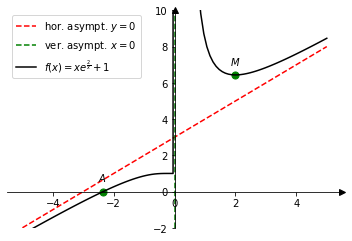

In [43]:
from sympy.abc import x

def f(x):
     return x * sympy.exp(1) ** (2/x) + 1

def df(x):
    return simplify(f(x).diff(x, 1))

def df2(x):
    return simplify(f(x).diff(x, 2))

print()
print("-" * 15 + " БЛОК 1 - f(x) " + "-" * 15)
print()

# Область определения
display(f(x))
D = continuous_domain(f(x), x, S.Reals)
display(D)

# Чётность
if f(-x) == f(x):
    print('Четная функция')
elif f(-x) == -f(x):
    print('Нечетная функция')
else:
    print('Функция общего вида')

# Точки пересечения с осями координат
roots = solveset(f(x), domain=S.Reals)
roots = [-2.345] # wolfram alpha в ручную
display(roots)


print()
print("-" * 15 + " БЛОК 2 - df(x) " + "-" * 15)
print()

# Точки экстремума <=> df(x) = 0
df_D = continuous_domain(df(x), x, S.Reals) # Это область определения производной.
df_root = solveset(df(x), domain=S.Reals)
df_root = [2] # wolfram alpha в ручную

display(df(x))
display(df_D)
display(df_root)
print()
print(df(x).subs(x, 1.9), df(x).subs(x, 2.1))
print("Производная меняет знак с - на +, значит x = 0 - точка минимума.")


print()
print("-" * 15 + " БЛОК 3 - df2(x) " + "-" * 15)
print()

# Точки перегиба <=> df2(x) = 0
df2_D = continuous_domain(df2(x), x, S.Reals) # Это область определения производной.
df2_root = list(solveset(df2(x), domain=S.Reals))
display(df2(x))
display(df2_D)
display(df2_root)
print("Нет точек перегиба")


print()
print("-" * 15 + " БЛОК 4 - Ассимптоты " + "-" * 15)
print()

print(f(x).limit(x, 0, dir='-'), f(x).limit(x, 0))
print("Вертикальныя ассимптота x = 0")
print()
print("Горизонтальная ассимптота, y = 1 * x + 3")
print(" lim(f(x)/x) , x->∞ = 1")
print("lim(f(x) - x), x->∞ = 3")


print()
print("-" * 15 + " БЛОК 5 - График " + "-" * 15)
print()

# Задание занчений полотна
minY = -2
maxY = 10
ax = plt.gca()
ax.set_ylim(minY, maxY)
X = np.linspace(-5, 5, 100)

# График горизантальной асимптоты
X_D = [x for x in X if x in D]
Y_D = [x+3 for x in X if x in D]
ax.plot(X_D, Y_D, color='red', linestyle='--', label=r'hor. asympt. $y=0$')

# График вертикальной асимптоты
ax.axvline(x=0, color='green', linestyle='--', label=r'ver. asympt. $x=0$')

# Рисование графика
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')

# Добавление точек
roots.extend([float(df_root[0])])
points_y = [float(f(point)) for point in roots]
annotations = [r'$A$', r'$M$']
ax.scatter(roots, points_y, 50, color='green')
for i, x0 in enumerate(roots):
    ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data', xytext=(-5, 10), textcoords='offset points', fontsize=10)

# Визуальные улучшения
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.legend(loc='upper left')

print("A - корень")
print("M - точка минимума")

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 


--------------- БЛОК 1 - f(x) ---------------



(6*x + 1)*exp(3/x) + 2

Union(Interval.open(-oo, 0), Interval.open(0, oo))

Функция общего вида


[-1.851]


--------------- БЛОК 2 - df(x) ---------------



(6*x**2 - 18*x - 3)*exp(3/x)/x**2

Union(Interval.open(-oo, 0), Interval.open(0, oo))

[-0.158, 3.158]


6.42394873053834e-6 -1.06676901844778e-11
Производная меняет знак с + на -, значит x = 0.158 - точка максимума.

-0.312224117072990 0.209474135231727
Производная меняет знак с - на +, значит x = 3.158 - точка минимуму.

--------------- БЛОК 3 - df2(x) ---------------



(60*x + 9)*exp(3/x)/x**4

Union(Interval.open(-oo, 0), Interval.open(0, oo))

[-0.15]


--------------- БЛОК 4 - Ассимптоты ---------------

2 oo
Вертикальная ассимптота y = 0

Горизонтальная ассимптота, y = 6 * x + 21
lim(f(x)/x)   , x->∞ = 6
lim(f(x) - 6x), x->∞ = 21

--------------- БЛОК 5 - График ---------------

A   - корень
M_1 - точка максимума
M_2 - точка минимума
P   - точка перегиба


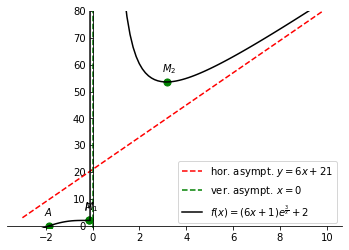

In [42]:
from sympy.abc import x

def f(x):
     return (6*x + 1) * sympy.exp(3/x) + 2

def df(x):
    return simplify(f(x).diff(x, 1))

def df2(x):
    return simplify(f(x).diff(x, 2))

print()
print("-" * 15 + " БЛОК 1 - f(x) " + "-" * 15)
print()

# Область определения
display(f(x))
D = continuous_domain(f(x), x, S.Reals)
display(D)

# Чётность
if f(-x) == f(x):
    print('Четная функция')
elif f(-x) == -f(x):
    print('Нечетная функция')
else:
    print('Функция общего вида')

# Точки пересечения с осями координат
roots = solveset(f(x), domain=S.Reals)
roots = [-1.851] # wolfram alpha
display(roots)


print()
print("-" * 15 + " БЛОК 2 - df(x) " + "-" * 15)
print()

# Точки экстремума <=> df(x) = 0
df_D = continuous_domain(df(x), x, S.Reals) # Это область определения производной.
df_root = solveset(df(x), domain=S.Reals)
df_root = [-0.158, 3.158]

display(df(x))
display(df_D)
display(df_root)
print()
print(df(x).subs(x, -0.2), df(x).subs(x, -0.1))
print("Производная меняет знак с + на -, значит x = 0.158 - точка максимума.")
print()
print(df(x).subs(x, 3.1), df(x).subs(x, 3.2))
print("Производная меняет знак с - на +, значит x = 3.158 - точка минимуму.")


print()
print("-" * 15 + " БЛОК 3 - df2(x) " + "-" * 15)
print()

# Точки перегиба <=> df2(x) = 0
df2_D = continuous_domain(df2(x), x, S.Reals) # Это область определения производной.
df2_root = solveset(df2(x), domain=S.Reals)
df2_root = [-0.15]
display(df2(x))
display(df2_D)
display(df2_root)


print()
print("-" * 15 + " БЛОК 4 - Ассимптоты " + "-" * 15)
print()

print(f(x).limit(x, 0, dir='-'), f(x).limit(x, 0))
print("Вертикальная ассимптота y = 0")
print()
print("Горизонтальная ассимптота, y = 6 * x + 21")
print("lim(f(x)/x)   , x->∞ = 6")
print("lim(f(x) - 6x), x->∞ = 21")


print()
print("-" * 15 + " БЛОК 5 - График " + "-" * 15)
print()

# Задание занчений полотна
minY = -1
maxY = 80
ax = plt.gca()
ax.set_ylim(minY, maxY)
X = np.linspace(-3, 10, 100)

# График горизантальной асимптоты
X_D = [x for x in X if x in D]
Y_D = [6*x+21 for x in X if x in D]
ax.plot(X_D, Y_D, color='red', linestyle='--', label=r'hor. asympt. $y=6x+21$')

# График вертикальной асимптоты
ax.axvline(x=0, color='green', linestyle='--', label=r'ver. asympt. $x=0$')

# Рисование графика
X_D = [x for x in X if x in D]
Y_D = [f(x) for x in X if x in D]
ax.plot(X_D, Y_D, 'k-', label=r'$f(x)=' + sympy.latex(f(x)) + r'$')

# Добавление точек
roots.extend([float(df_root[0]), float(df_root[1]), float(df2_root[0])])
points_y = [float(f(point)) for point in roots]
annotations = [r'$A$', r'$M_1$', r'$M_2$', r'$P$']
ax.scatter(roots, points_y, 50, color='green')
for i, x0 in enumerate(roots):
    ax.annotate(annotations[i], xy=(x0, points_y[i]), xycoords='data', xytext=(-5, 10), textcoords='offset points', fontsize=10)

# Визуальные улучшения
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.legend(loc='lower right')

print("A   - корень")
print("M_1 - точка максимума")
print("M_2 - точка минимума")
print("P   - точка перегиба")